In [2]:
import pandas as pd
import numpy as np
from statistics import mean
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
x = [[1],[2],[3],[5],[6],[7],[8],[9],[10],[12],[13],[14],[15],[16],[18],[19],[21],[22]]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


In [4]:
x_data = np.array(x)
#x_data.reshape(-1,1)
y_data = np.array(y)
#print(x_data.shape)

#print(y_data.shape)
x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size = 0.3 )
#x_train.reshape(1,12)
print( x_train.shape, y_train.shape )
print( x_test.shape, y_test.shape )


(12, 1) (12,)
(6, 1) (6,)


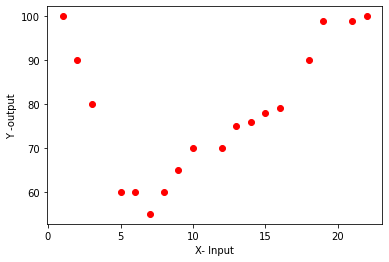

In [5]:
plt.scatter( x_data,y_data,color = 'red' )
plt.xlabel("X- Input")
plt.ylabel("Y -output")
plt.show()

In [6]:
polynomial_equation = PolynomialFeatures(degree = 11)
input_x_train = polynomial_equation.fit_transform(x_train)
print(polynomial_equation)
print(input_x_train)

input_x_test = polynomial_equation.fit_transform(x_test)
print("Input of testing data : {}".format(input_x_test))

PolynomialFeatures(degree=11)
[[1.00000000e+00 1.60000000e+01 2.56000000e+02 4.09600000e+03
  6.55360000e+04 1.04857600e+06 1.67772160e+07 2.68435456e+08
  4.29496730e+09 6.87194767e+10 1.09951163e+12 1.75921860e+13]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.20000000e+01 4.84000000e+02 1.06480000e+04
  2.34256000e+05 5.15363200e+06 1.13379904e+08 2.49435789e+09
  5.48758735e+10 1.20726922e+12 2.65599228e+13 5.84318301e+14]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04 7.81250000e+04
  3.90625000e+05 1.95312500e+06 9.76562500e+06 4.88281250e+07]
 [1.00000000e+00 2.10000000e+01 4.41000000e+02 9.26100000e+03
  1.94481000e+05 4.08410100e+06 8.57661210e+07 1.80108854e+09
  3.78228594e+10 7.94280047e+11 1.66798810e+13 3.50277501e+14]
 [1.00000000e+00 9.00000000e+00 8.1

In [7]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(input_x_train, y_train)

In [8]:
#get linear regression coefficients
slope = reg.coef_
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : [ 0.00000000e+00 -7.52615982e-01 -1.54892748e+00 -1.35975830e+00
  5.49454701e-01 -7.85563433e-02  5.08384560e-03 -6.31950707e-05
 -1.28420335e-05  9.15512571e-07 -2.62551106e-08  2.89886781e-10], Intercept : 102.71957358534564


In [16]:
#Scores predicted = slope(m) * x(height) + b(intercept)......(Testing)
#print(y_train.shape)
def my_prediction(x,y,m,b):
    predicted_train= np.zeros(y.shape)
    
    for i in range(len((x))):
        for j in range(len(x[i])):
            predicted_train[i] += (m[j] * x[i][j]) 
        predicted_train[i]  += b
    return predicted_train


a= my_prediction(input_x_train,y_train,slope,intercept)
b= my_prediction(input_x_test,y_test,slope,intercept)

print("training data : {} testing data : {}".format(a,b))



training data : [79.70117233 99.53417888 99.9338198  59.211555   99.01243565 64.45374454
 56.23573466 75.63280347 90.73246956 76.94855053 59.69653217 98.9070034 ] testing data : [75.98404627 55.64938348 78.72472381 69.09673118 74.77441673 92.09248841]


In [17]:
accuracy_check_training = reg.score(input_x_train, y_train)
accuracy_check_testing = reg.score(input_x_test, y_test)
print(accuracy_check_training,accuracy_check_testing)

0.9983938564234235 0.9072409451145363


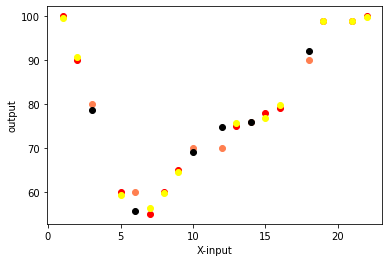

In [18]:
plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color = 'coral')
plt.xlabel('X-input')
plt.ylabel('output')
plt.scatter(x_train,a, color = 'yellow')
plt.scatter(x_test,b, color = 'black')
plt.show()